## Multiple Logistic Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df.isna().sum().sum()

149

In [5]:
df.fillna(0, inplace=True)

In [6]:
df.isna().sum().sum()

0

In [7]:
df.shape

(614, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,141.166124,334.201954,0.773616
std,6109.041673,2926.248369,88.340630,82.183884,0.418832
min,150.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [10]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df = df.drop(['Loan_ID', 'CoapplicantIncome'], axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,187.0,360.0,1.0,Urban,Y


In [13]:
df.describe()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,141.166124,334.201954,0.773616
std,6109.041673,88.340630,82.183884,0.418832
min,150.000000,0.000000,0.000000,0.000000
25%,2877.500000,98.000000,360.000000,1.000000
50%,3812.500000,125.000000,360.000000,1.000000
75%,5795.000000,164.750000,360.000000,1.000000
max,81000.000000,700.000000,480.000000,1.000000


## Checking loan approval status based on salary

In [14]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [15]:
def salary(income):
    if income < 2000:
        return 'low'
    elif income < 5000:
        return 'medium'
    else:
        return 'high'

In [16]:
df['ApplicantIncome'] = df['ApplicantIncome'].apply(salary)

In [17]:
df['ApplicantIncome']

0        high
1      medium
2      medium
3      medium
4        high
        ...  
609    medium
610    medium
611      high
612      high
613    medium
Name: ApplicantIncome, Length: 614, dtype: object

In [18]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,high,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,medium,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,medium,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,medium,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,high,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,medium,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,medium,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,high,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,high,187.0,360.0,1.0,Urban,Y


In [19]:
p = pd.crosstab(df['ApplicantIncome'], df['Loan_Status'])
p

Loan_Status,N,Y
ApplicantIncome,,
high,62,134
low,15,25
medium,115,263


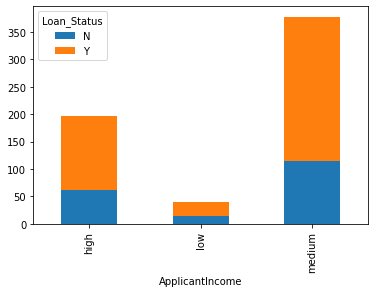

In [20]:
p.plot(kind = 'bar', stacked = True)
plt.show()

## Observation

- High Income - nearly 70 % possibility of getting loan

- Low and Medium Income - nearly 65 % possibility of getting loan

## Checking Graduates Loan Status Approval

In [21]:
r = pd.crosstab(df['Education'], df['Loan_Status'])
r

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


## Visualization

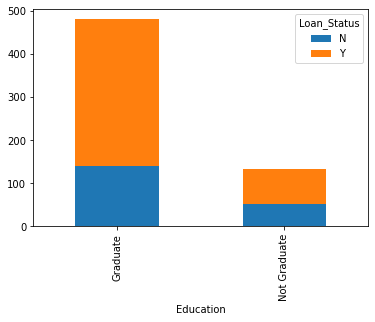

In [22]:
r.plot(kind = 'bar', stacked = True)
plt.show()

## Observation

- Graduate - nearly 70 % possibility of getting loan

- Non Graduate - nearly 60 % possibility of getting loan

## Checking the status of loan approval for married and non married

In [23]:
s = pd.crosstab(df['Married'], df['Loan_Status'])
s

Loan_Status,N,Y
Married,,
0,0,3
No,79,134
Yes,113,285


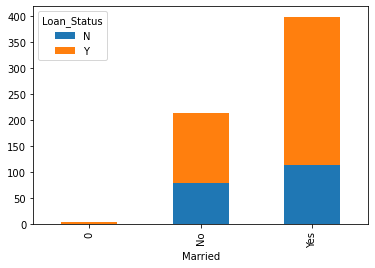

In [24]:
s.plot(kind = 'bar', stacked = True)
plt.show()

In [25]:
s1 = pd.crosstab(df['Loan_Status'], df['Married'])
s1

Married,0,No,Yes
Loan_Status,,,
N,0,79,113
Y,3,134,285


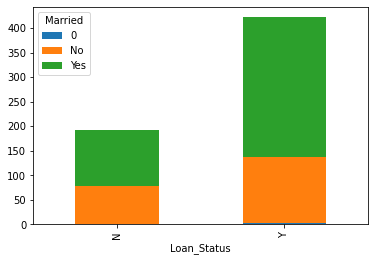

In [26]:
s1.plot(kind = 'bar', stacked = True)
plt.show()

## Observation

- Married - nearly 70 % possibility of getting loan

- Non Married - nearly 60 % possibility of getting loan

In [27]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,high,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,medium,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,medium,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,medium,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,high,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,medium,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,medium,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,high,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,high,187.0,360.0,1.0,Urban,Y


In [28]:
t = pd.crosstab(df['Loan_Status'], df['Dependents'])
t

Dependents,0,0,1,2,3+
Loan_Status,,,,,
N,6,107,36,25,18
Y,9,238,66,76,33


In [29]:
t1 = pd.crosstab(df['Dependents'], df['Loan_Status'])
t1

Loan_Status,N,Y
Dependents,,
0,6,9
0,107,238
1,36,66
2,25,76
3+,18,33


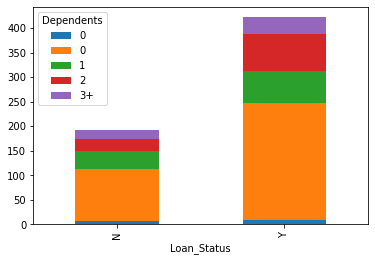

In [30]:
t.plot(kind = 'bar', stacked = True)
plt.show()

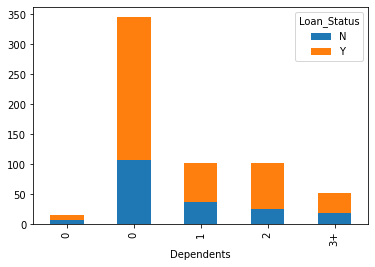

In [31]:
t1.plot(kind = 'bar', stacked = True)
plt.show()

## Observation based on dependencies

- 0  dependent - nearly 70% possibility of getting loan
- 1  dependent - nearly 70% possibility of getting loan
- 2  dependent - nearly 80% possibility of getting loan
- 3+ dependent - nearly 60% possibility of getting loan


In [32]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,high,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,medium,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,medium,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,medium,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,high,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,medium,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,medium,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,high,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,high,187.0,360.0,1.0,Urban,Y


In [33]:
df = df.drop(['Self_Employed', 'Loan_Amount_Term'], axis = 1)
df

,Gender,Married,Dependents,Education,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,high,0.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,medium,128.0,1.0,Rural,N
2,Male,Yes,0,Graduate,medium,66.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,medium,120.0,1.0,Urban,Y
4,Male,No,0,Graduate,high,141.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,medium,71.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,medium,40.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,high,253.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,high,187.0,1.0,Urban,Y


In [34]:
df.LoanAmount.describe()

count    614.000000
mean     141.166124
std       88.340630
min        0.000000
25%       98.000000
50%      125.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [35]:
def loan_amount(amount):
    if amount < 100:
        return 'low'
    elif amount < 125:
        return 'medium'
    else:
        return 'high'

In [36]:
df['LoanAmount'] = df['LoanAmount'].apply(loan_amount)

In [37]:
df['LoanAmount']

0         low
1        high
2         low
3      medium
4        high
        ...  
609       low
610       low
611      high
612      high
613      high
Name: LoanAmount, Length: 614, dtype: object

In [38]:
u = pd.crosstab(df['LoanAmount'], df['Loan_Status'])
u

Loan_Status,N,Y
LoanAmount,,
high,98,213
low,54,107
medium,40,102


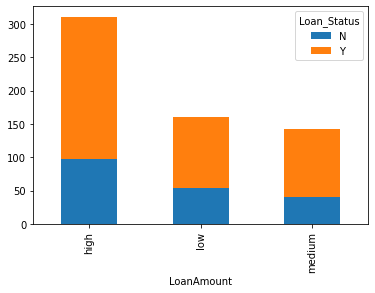

In [39]:
u.plot(kind = 'bar', stacked = True)
plt.show()

## Observation based on LoanAmount

- high - nearly 70% possibility of getting loan
- medium - nearly 70% possibility of getting loan
- low - nearly 70% possibility of getting loan


In [40]:
df

,Gender,Married,Dependents,Education,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,high,low,1.0,Urban,Y
1,Male,Yes,1,Graduate,medium,high,1.0,Rural,N
2,Male,Yes,0,Graduate,medium,low,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,medium,medium,1.0,Urban,Y
4,Male,No,0,Graduate,high,high,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,medium,low,1.0,Rural,Y
610,Male,Yes,3+,Graduate,medium,low,1.0,Rural,Y
611,Male,Yes,1,Graduate,high,high,1.0,Urban,Y
612,Male,Yes,2,Graduate,high,high,1.0,Urban,Y


In [41]:
v = pd.crosstab(df['Credit_History'], df['Loan_Status'])
v

Loan_Status,N,Y
Credit_History,,
0.0,95,44
1.0,97,378


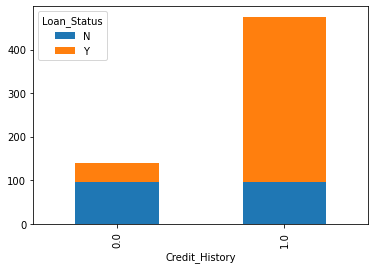

In [42]:
v.plot(kind = 'bar', stacked = True)
plt.show()

## Observation based on Credit History

- 1 - nearly 80% possibility of getting loan
- 0 - nearly 30% possibility of getting loan


In [43]:
w = pd.crosstab(df['Property_Area'], df['Loan_Status'])
w

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


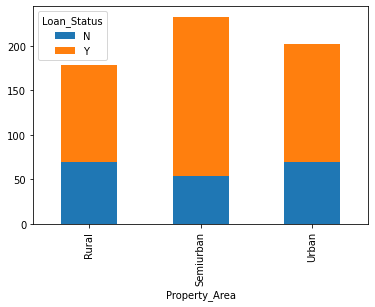

In [44]:
w.plot(kind = 'bar', stacked = True)
plt.show()

## Observation based on Property Area

- rural - nearly 60% possibility of getting loan
- semiurban - nearly 80% possibility of getting loan
- urban - nearly 70% possibility of getting loan


In [45]:
x = pd.crosstab(df['Gender'], df['Loan_Status'])
x

Loan_Status,N,Y
Gender,,
0,5,8
Female,37,75
Male,150,339


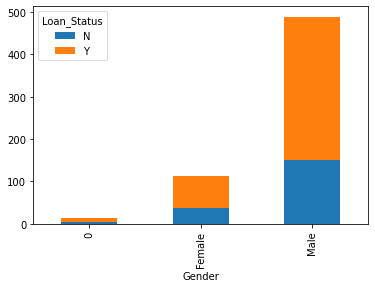

In [46]:
x.plot(kind = 'bar', stacked = True)
plt.show()

## Observation based on Gender

- Female - nearly 70% possibility of getting loan
- Male - nearly 70% possibility of getting loan



In [47]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [48]:
df

,Gender,Married,Dependents,Education,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,high,low,1.0,Urban,Y
1,Male,Yes,1,Graduate,medium,high,1.0,Rural,N
2,Male,Yes,0,Graduate,medium,low,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,medium,medium,1.0,Urban,Y
4,Male,No,0,Graduate,high,high,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,medium,low,1.0,Rural,Y
610,Male,Yes,3+,Graduate,medium,low,1.0,Rural,Y
611,Male,Yes,1,Graduate,high,high,1.0,Urban,Y
612,Male,Yes,2,Graduate,high,high,1.0,Urban,Y


In [49]:
df.Gender = df.Gender.replace({'Male': 1, 'Female': 0})

In [50]:
df

,Gender,Married,Dependents,Education,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,high,low,1.0,Urban,Y
1,1,Yes,1,Graduate,medium,high,1.0,Rural,N
2,1,Yes,0,Graduate,medium,low,1.0,Urban,Y
3,1,Yes,0,Not Graduate,medium,medium,1.0,Urban,Y
4,1,No,0,Graduate,high,high,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
609,0,No,0,Graduate,medium,low,1.0,Rural,Y
610,1,Yes,3+,Graduate,medium,low,1.0,Rural,Y
611,1,Yes,1,Graduate,high,high,1.0,Urban,Y
612,1,Yes,2,Graduate,high,high,1.0,Urban,Y


In [51]:
df.Married = df.Married.replace({'No': 0, 'Yes': 1})

In [52]:
df

,Gender,Married,Dependents,Education,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,high,low,1.0,Urban,Y
1,1,1,1,Graduate,medium,high,1.0,Rural,N
2,1,1,0,Graduate,medium,low,1.0,Urban,Y
3,1,1,0,Not Graduate,medium,medium,1.0,Urban,Y
4,1,0,0,Graduate,high,high,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
609,0,0,0,Graduate,medium,low,1.0,Rural,Y
610,1,1,3+,Graduate,medium,low,1.0,Rural,Y
611,1,1,1,Graduate,high,high,1.0,Urban,Y
612,1,1,2,Graduate,high,high,1.0,Urban,Y


In [53]:
df.Education = df.Education.replace({'Graduate': 1, 'Not Graduate': 0})

In [54]:
df

,Gender,Married,Dependents,Education,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,high,low,1.0,Urban,Y
1,1,1,1,1,medium,high,1.0,Rural,N
2,1,1,0,1,medium,low,1.0,Urban,Y
3,1,1,0,0,medium,medium,1.0,Urban,Y
4,1,0,0,1,high,high,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,medium,low,1.0,Rural,Y
610,1,1,3+,1,medium,low,1.0,Rural,Y
611,1,1,1,1,high,high,1.0,Urban,Y
612,1,1,2,1,high,high,1.0,Urban,Y


In [55]:
df.ApplicantIncome = df.ApplicantIncome.replace({'high': 1 , 'medium': 2, 'low' : 3})

In [56]:
df

,Gender,Married,Dependents,Education,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,1,low,1.0,Urban,Y
1,1,1,1,1,2,high,1.0,Rural,N
2,1,1,0,1,2,low,1.0,Urban,Y
3,1,1,0,0,2,medium,1.0,Urban,Y
4,1,0,0,1,1,high,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,2,low,1.0,Rural,Y
610,1,1,3+,1,2,low,1.0,Rural,Y
611,1,1,1,1,1,high,1.0,Urban,Y
612,1,1,2,1,1,high,1.0,Urban,Y


In [57]:
df = df.drop(['Property_Area'], axis = 1)
df

,Gender,Married,Dependents,Education,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
0,1,0,0,1,1,low,1.0,Y
1,1,1,1,1,2,high,1.0,N
2,1,1,0,1,2,low,1.0,Y
3,1,1,0,0,2,medium,1.0,Y
4,1,0,0,1,1,high,1.0,Y
...,...,...,...,...,...,...,...,...
609,0,0,0,1,2,low,1.0,Y
610,1,1,3+,1,2,low,1.0,Y
611,1,1,1,1,1,high,1.0,Y
612,1,1,2,1,1,high,1.0,Y


In [58]:
df.LoanAmount = df.LoanAmount.replace({'high':1, 'medium': 2, 'low': 3})

In [59]:
df

,Gender,Married,Dependents,Education,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
0,1,0,0,1,1,3,1.0,Y
1,1,1,1,1,2,1,1.0,N
2,1,1,0,1,2,3,1.0,Y
3,1,1,0,0,2,2,1.0,Y
4,1,0,0,1,1,1,1.0,Y
...,...,...,...,...,...,...,...,...
609,0,0,0,1,2,3,1.0,Y
610,1,1,3+,1,2,3,1.0,Y
611,1,1,1,1,1,1,1.0,Y
612,1,1,2,1,1,1,1.0,Y


In [60]:
df.Dependents = df.Dependents.replace({'1': 1, '0': 0 , '2':2, '3+': 3 })

In [61]:
df.dtypes

Gender               int64
Married              int64
Dependents           int64
Education            int64
ApplicantIncome      int64
LoanAmount           int64
Credit_History     float64
Loan_Status         object
dtype: object

In [62]:
df

,Gender,Married,Dependents,Education,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
0,1,0,0,1,1,3,1.0,Y
1,1,1,1,1,2,1,1.0,N
2,1,1,0,1,2,3,1.0,Y
3,1,1,0,0,2,2,1.0,Y
4,1,0,0,1,1,1,1.0,Y
...,...,...,...,...,...,...,...,...
609,0,0,0,1,2,3,1.0,Y
610,1,1,3,1,2,3,1.0,Y
611,1,1,1,1,1,1,1.0,Y
612,1,1,2,1,1,1,1.0,Y


In [63]:
df.dtypes

Gender               int64
Married              int64
Dependents           int64
Education            int64
ApplicantIncome      int64
LoanAmount           int64
Credit_History     float64
Loan_Status         object
dtype: object

In [64]:
df.Credit_History = df.Credit_History.astype(int)

In [65]:
df.dtypes

Gender              int64
Married             int64
Dependents          int64
Education           int64
ApplicantIncome     int64
LoanAmount          int64
Credit_History      int32
Loan_Status        object
dtype: object

In [66]:
y = df.Loan_Status

In [67]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [68]:
x = df.drop(['Loan_Status'], axis=1)
x

,Gender,Married,Dependents,Education,ApplicantIncome,LoanAmount,Credit_History
0,1,0,0,1,1,3,1
1,1,1,1,1,2,1,1
2,1,1,0,1,2,3,1
3,1,1,0,0,2,2,1
4,1,0,0,1,1,1,1
...,...,...,...,...,...,...,...
609,0,0,0,1,2,3,1
610,1,1,3,1,2,3,1
611,1,1,1,1,1,1,1
612,1,1,2,1,1,1,1


In [69]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2)

In [70]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 7)
(123, 7)
(491,)
(123,)


In [71]:
model = LogisticRegression()

In [72]:
model.fit(x_train, y_train)

LogisticRegression()

In [73]:
model.score(x_train , y_train)

0.7596741344195519

In [74]:
model.score(x_test, y_test)

0.8130081300813008

In [75]:
y_predict = model.predict(x_test)

In [76]:
y_predict

array(['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N'], dtype=object)

In [77]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
558,Y,Y
345,Y,Y
31,N,Y
216,N,Y
395,Y,N
...,...,...
111,Y,Y
388,Y,Y
502,Y,Y
115,Y,Y


## Confusion Matrix

In [78]:
performance = confusion_matrix(y_test, y_predict)

In [79]:
performance

array([[19, 17],
       [ 6, 81]], dtype=int64)

In [80]:
performance2 = classification_report(y_test, y_predict)
performance2

'              precision    recall  f1-score   support\n\n           N       0.76      0.53      0.62        36\n           Y       0.83      0.93      0.88        87\n\n    accuracy                           0.81       123\n   macro avg       0.79      0.73      0.75       123\nweighted avg       0.81      0.81      0.80       123\n'